In [6]:
# imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
random_state = 99

## Text Preprocessing

In [7]:
# import the excel file
df = pd.read_csv('../Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [8]:
# keep only the reviews.rating and reviews.text columns
df = df[['reviews.rating', 'reviews.text']]
df.head()

,reviews.rating,reviews.text
0,3,I order 3 of them and one of the item is bad q...
1,4,Bulk is always the less expensive way to go fo...
2,5,Well they are not Duracell but for the price i...
3,5,Seem to work as well as name brand batteries a...
4,5,These batteries are very long lasting the pric...


In [9]:
# apply sentiment labels for the reviews.rating
df['sentiment'] = df['reviews.rating'].apply(lambda x: 'negative' if x <= 2 else ('neutral' if x == 3 else 'positive'))
df.head()

,reviews.rating,reviews.text,sentiment
0,3,I order 3 of them and one of the item is bad q...,neutral
1,4,Bulk is always the less expensive way to go fo...,positive
2,5,Well they are not Duracell but for the price i...,positive
3,5,Seem to work as well as name brand batteries a...,positive
4,5,These batteries are very long lasting the pric...,positive


In [10]:
# preprocess the reviews.text column

# get stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # remove capital letters
    text = text.lower()

    # tokenize the text
    tokens = word_tokenize(text)

    # remove stopwords and lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]

    return ' '.join(tokens)

df['reviews.text'] = df['reviews.text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mtort\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mtort\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mtort\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews.rating,reviews.text,sentiment
0,3,order one item bad quality missing backup spri...,neutral
1,4,bulk always le expensive way go product like,positive
2,5,well duracell price happy,positive
3,5,seem work well name brand battery much better ...,positive
4,5,battery long lasting price great,positive


## Initial Data Visualizations

By creating a histogram of the ratings, we see that ratings tend to skew heavily towards 5 stars, suggesting to us that either people tend to leave only positive reviews or that they're failing to mark bad products low enough. This skew should be awknoledged in our model design.

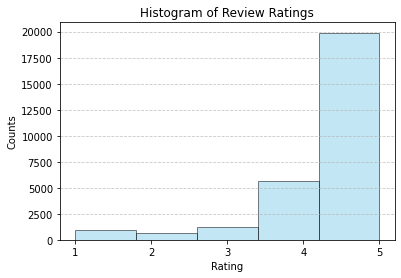

In [11]:
plt.hist(df['reviews.rating'], bins=5, color='skyblue', edgecolor='black', alpha=0.5)
plt.title('Histogram of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.xticks(range(1, 6))  # Adjust x-axis ticks to match rating scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the wordclouds below we see that a majorityof the words revolve around the product with a few sentimental words. Additionally, reviews at all stars have some positive words such as "good", meaning that the model may not be able to rely on few words to give its prediction.

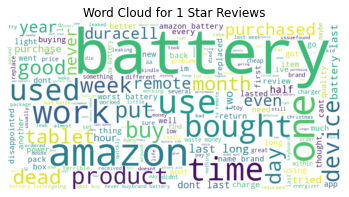

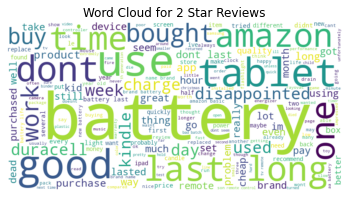

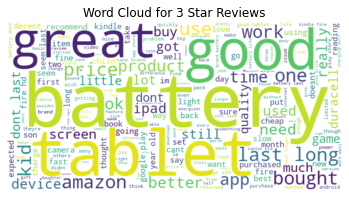

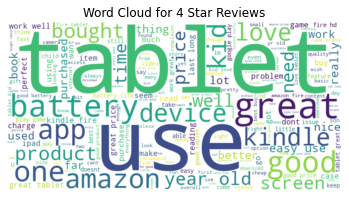

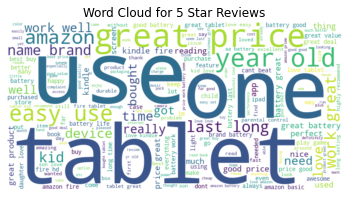

In [12]:
for rating in range(1,6):
    reviews_subset = df[df['reviews.rating'] == rating]['reviews.text']
    text = ' '.join(reviews_subset)
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {rating} Star Reviews')
    plt.axis('off')
    plt.show()

## Pytorch Model Building

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class LanguageModel(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        # create a starting embedding matrix for your vocabulary
        # dims: (vocab_size x embed_dim)
        self.embed = nn.Embedding(vocab_size, embed_dim)
        # layers do the actual learning
        self.layers = nn.Sequential(
            nn.Linear(in_features=embed_dim, out_features=5000),
            nn.Linear(in_features=5000, out_features=10000),
            nn.Linear(in_features=10000, out_features=5000),
            nn.Linear(in_features=5000, out_features=vocab_size)
        ),
        # norm standardize the layers to stabalize grads
        self.norm = nn.LayerNorm(embed_dim)
        # convert last embed layer back into vocab array
        self.decoder = nn.Linear(embed_dim, vocab_size)
        
    def forward(self, x):
        # figure out how to do forward pass
        x = self.embed(x)
        x = self.layers(x) # TODO: im not sure if we can just call linear layers like this
        x = self.norm(x)
        x = self.decoder(x)
        return x

In [14]:
vocab_size = 10000
embed_dim = 1000
num_training_epochs = 10
optimizer_learning_rate = 0.01

# define data (TODO: we need to tokenize this b4 it enters the model)
X = df['reviews.text'].values.astype(np.float32)
y = df['reviews.stars'].values.astype(np.float32)

# initialize model, loss function, and optimizer
model = LanguageModel(vocab_size, embed_dim)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=optimizer_learning_rate)

def train_model():
    # run training loop
    in_batch = torch.from_numpy(X.astype(np.float32))
    target_batch = torch.from_numpy(y.astype(np.float32))
    
    # keep statistics
    train_loss_list = []
    for epoch in range(num_training_epochs):
        # make predictions and find loss
        out_batch = model(in_batch)
        loss = loss_fn(out_batch, target_batch)
        
        # clear grads, do backwards pass to find new grads, update weights
        model.zero_grad()
        loss.backward()
        optimizer.step()
        
        # count relevant stats
        train_loss_list.append(loss.detatch())
    return train_loss_list

train_loss_list = train_model()
plt.plot(range(len(train_loss_list)), train_loss_list)
plt.show()

ValueError: could not convert string to float: 'order one item bad quality missing backup spring put pc aluminum make battery work'